# CSE 6367 
# Programming Assignment 3 (P3)

## Eigenfaces (100 points)

### Task1 (30 points)
1. Load all the 25 images in the "/Eigenfaces/Train"
2. Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

In [413]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
from scipy import ndimage
import os
import cv2

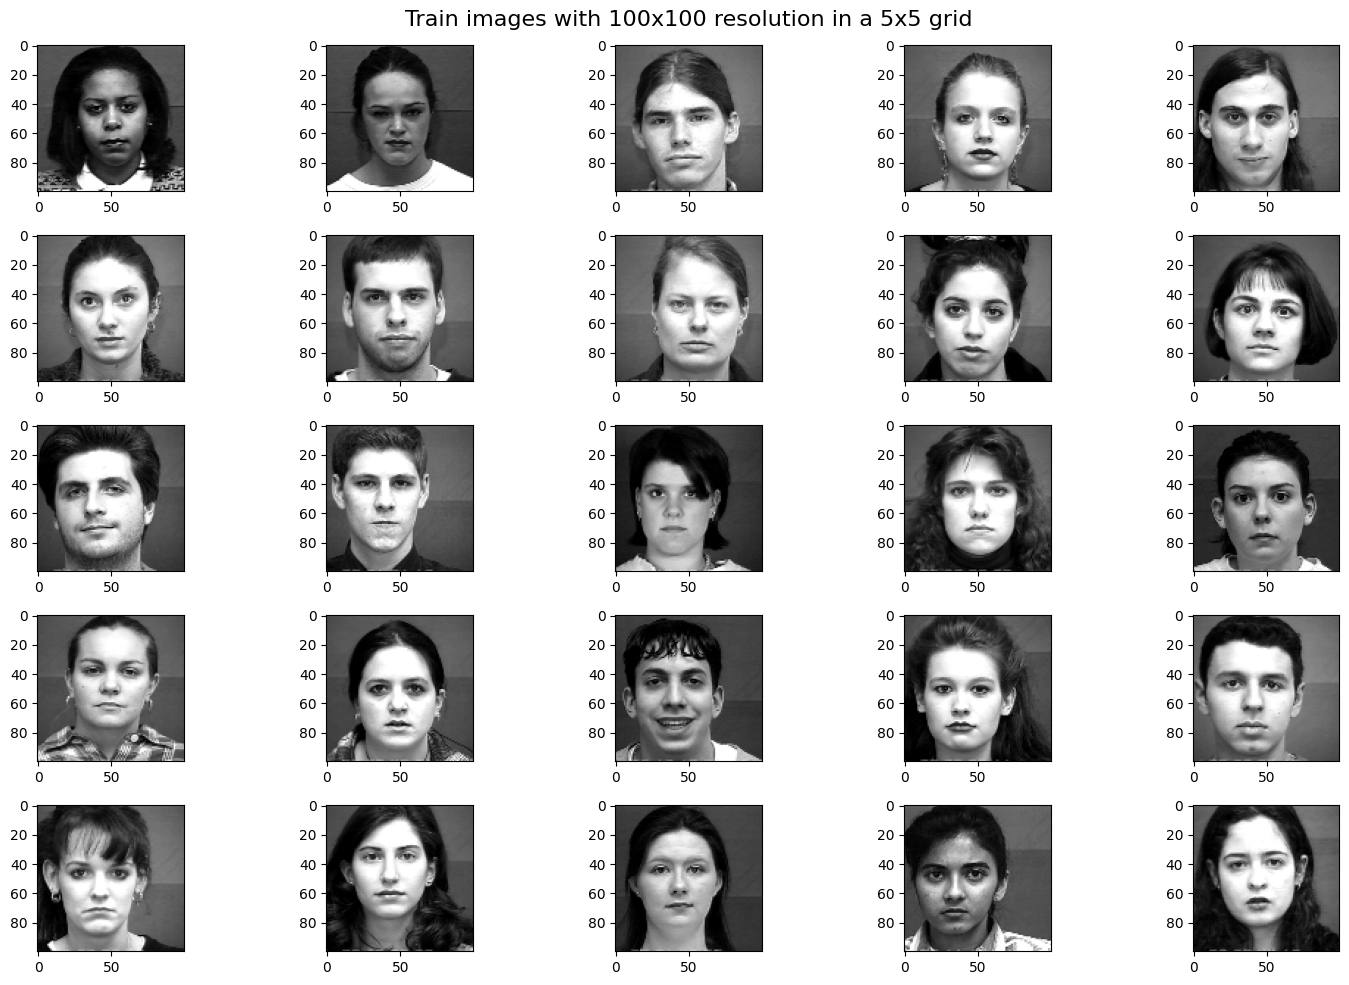

In [414]:
eigenfaces = os.listdir('./Eigenfaces/Train')

plt.figure(figsize=(15,10))
plt.suptitle('Train images with 100x100 resolution in a 5x5 grid', fontsize=16)

train_faces = []
for i, eigenface in enumerate(eigenfaces):
    img = cv2.imread(os.path.join('./Eigenfaces/Train', eigenface), 0)
    train_faces.append(img)
    img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_LINEAR)
    
    plt.subplot(5,5,i+1)
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

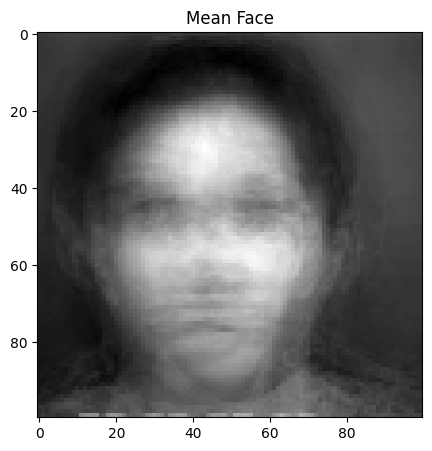

In [415]:
# Finding mean face = adding all images and dividing by total 25.

mean_face = np.zeros((425,425), dtype=np.float32)

for eigenface in eigenfaces:
    img = cv2.imread(os.path.join('./Eigenfaces/Train', eigenface), 0)
    mean_face += img

mean_face = mean_face/25;
mean_face_display = cv2.resize(mean_face, (100, 100), interpolation = cv2.INTER_LINEAR)

plt.figure(figsize=(5,5))
plt.imshow(mean_face_display, cmap='gray')
plt.title('Mean Face')
plt.show()

In [416]:
# Performing PCA on training faces
X_flat = []
for trainface in eigenfaces:
    face = cv2.imread(os.path.join('./Eigenfaces/Train', trainface), 0)
    # Standardization
    mu = np.mean(face, axis=0)
    std = np.std(face, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.0
    face_standardized = (face - mu)/std_filled;
    face_flat = face_standardized.flatten()
    X_flat.append(face_flat)

X_flat = np.asarray(X_flat)

# Covariance calculation -> Will make square matrix (25, 180625) * (180625, 25) = (25,25)
for trainface in eigenfaces:
    face = cv2.imread(os.path.join('./Eigenfaces/Train', trainface), 0)
    S = np.cov(X_flat)
    
    # Eigenvectors(2-D) and eigenvalues(1-D) using np.linag.eigh
    eigenvalues, eigenvectors = np.linalg.eig(S)
    sorted_eig = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[sorted_eig]
    eigenvectors = eigenvectors[:, sorted_eig]

    # generated_faces = eigenvectors @ X_flat
    # generated_faces = generated_faces.reshape((25, 425, 425))
    
    # # Plot the generated eigenfaces
    # plt.figure(figsize=(10, 10))
    # for i in range(25):
    #     plt.subplot(5, 5, i + 1)
    #     plt.imshow(generated_faces[i], cmap='gray')
    #     plt.axis('off')
    
    plt.show()
        
    
#####################################################################################################################################

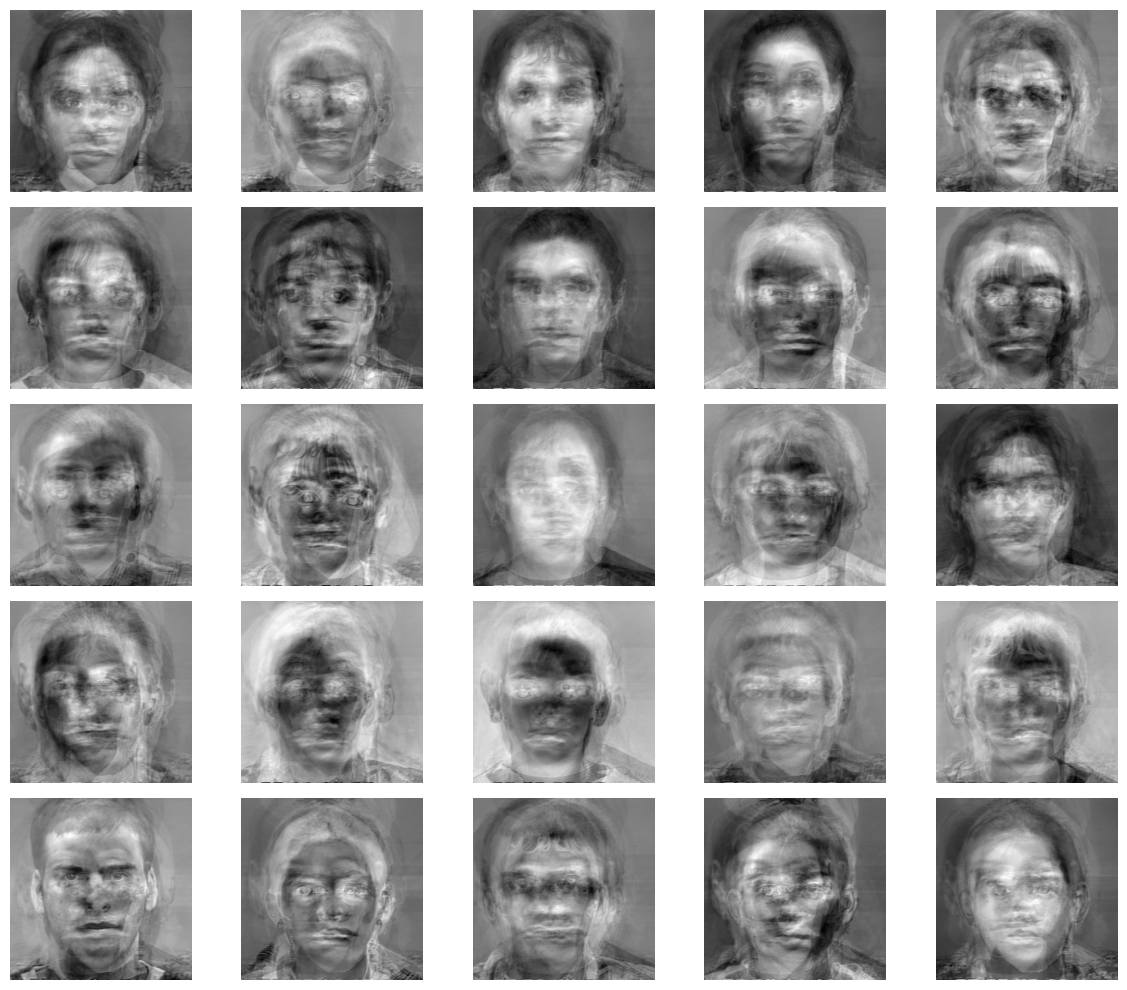

In [417]:
X = np.array(train_faces) # X.shape = (25, 425, 425)
X_flat = X.reshape((25, -1)) # X_flat.shape = (25, 180625)

# Standardize and mean-center the data
mu = np.mean(X_flat, axis=0)
std = np.std(X_flat, axis=0)
std_filled = np.where(std == 0, 1.0, std)
X_standardized = (X_flat - mu) / std_filled

# PCA Process
S = np.cov(X_standardized) # S.shape = (25, 25)
eigenvalues, eigenvectors = np.linalg.eig(S)
eigenvectors = eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices] # eigenvectors.shape = (25, 25)

# Visualize eigenfaces
generated_faces = eigenvectors @ X_flat # (25,25) with (25, 180625) => (25, 180625)
generated_faces = generated_faces.reshape((25, 425, 425)) # Total 25 images of (425, 425)

# Plot the generated eigenfaces
plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(generated_faces[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Task2 (30 points)

1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

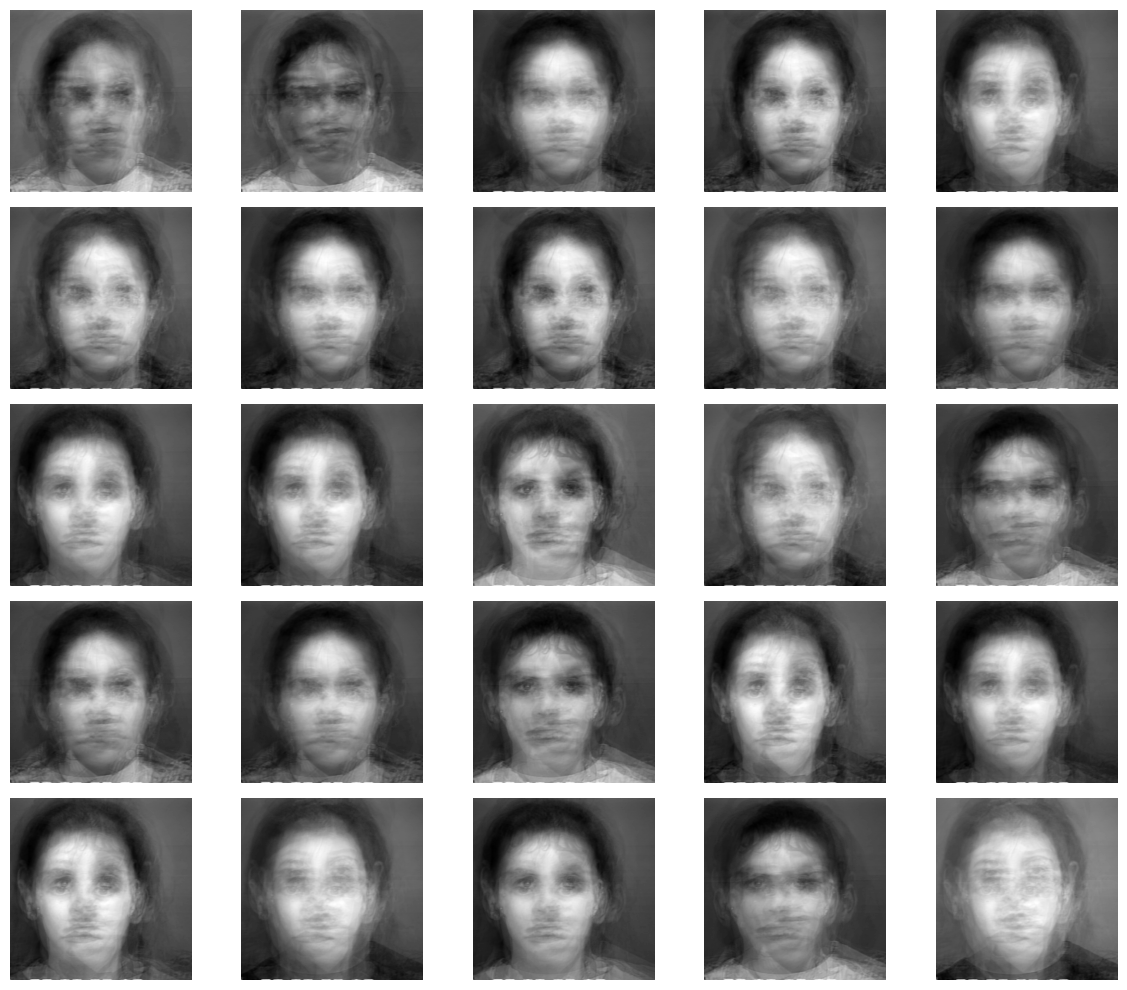

In [418]:
X = np.array(train_faces) # X.shape = (25, 425, 425)
X_flat = X.reshape((25, -1)) # X_flat.shape = (25, 180625)

# Standardize and mean-center the data
mu = np.mean(X_flat, axis=0)
std = np.std(X_flat, axis=0)
std_filled = np.where(std == 0, 1.0, std)
X_standardized = (X_flat - mu) / std_filled

# PCA Process
S = np.cov(X_standardized) # S.shape = (25, 25)
eigenvalues, eigenvectors = np.linalg.eig(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices] # eigenvectors.shape = (25, 25)

k = 2
selected_eigenvectors = eigenvectors[:, :k]

# Project the standardized data onto the selected eigenvectors
projected_data = X_standardized.T @ selected_eigenvectors # (180625, 25) matmul (25, k) => (180625, k)

# Reconstruct the data by multiplying the projected data by the selected eigenvectors
reconstructed_data = projected_data @ selected_eigenvectors.T # (180625, k) matmul (k, 25) => (180625, 25)

reconstructed_data = (reconstructed_data.T * std_filled) + mu # (25, 180625)
reconstructed_faces = reconstructed_data.reshape((25, 425, 425))

plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

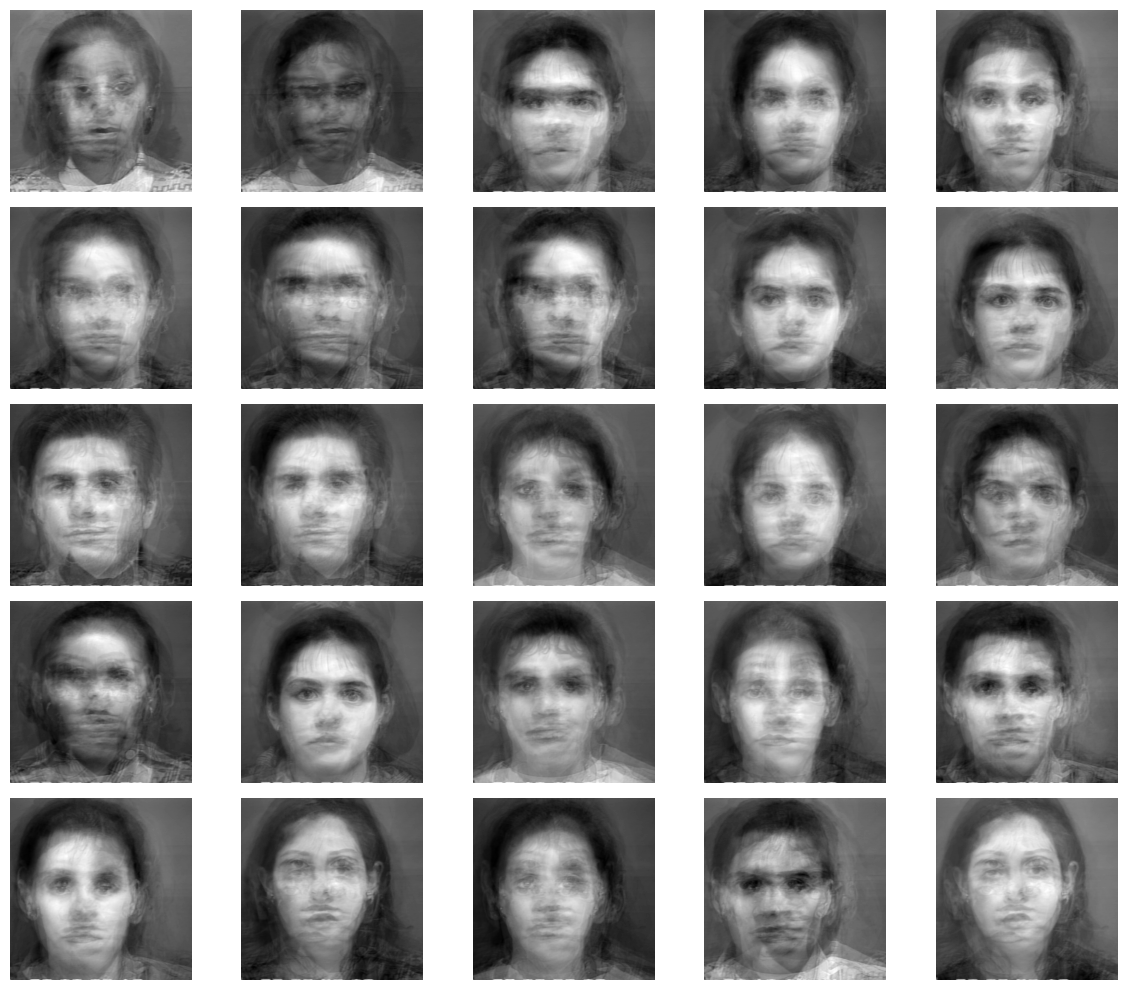

In [419]:
X = np.array(train_faces) # X.shape = (25, 425, 425)
X_flat = X.reshape((25, -1)) # X_flat.shape = (25, 180625)

mu = np.mean(X_flat, axis=0)
std = np.std(X_flat, axis=0)

X_standardized = (X_flat - mu) / std_filled

# PCA Process
S = np.cov(X_standardized) # S.shape = (25, 25)
eigenvalues, eigenvectors = np.linalg.eig(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices] # eigenvectors.shape = (25, 25)

k = 5
selected_eigenvectors = eigenvectors[:, :k]

# Project the standardized data onto the selected eigenvectors
projected_data = X_standardized.T @ selected_eigenvectors # (180625, 25) matmul (25, k) => (180625, k)

# Reconstruct the data by multiplying the projected data by the selected eigenvectors
reconstructed_data = projected_data @ selected_eigenvectors.T # (180625, k) matmul (k, 25) => (180625, 25)

reconstructed_data = (reconstructed_data.T * std_filled) + mu # (25, 180625)
reconstructed_faces = reconstructed_data.reshape((25, 425, 425))

plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

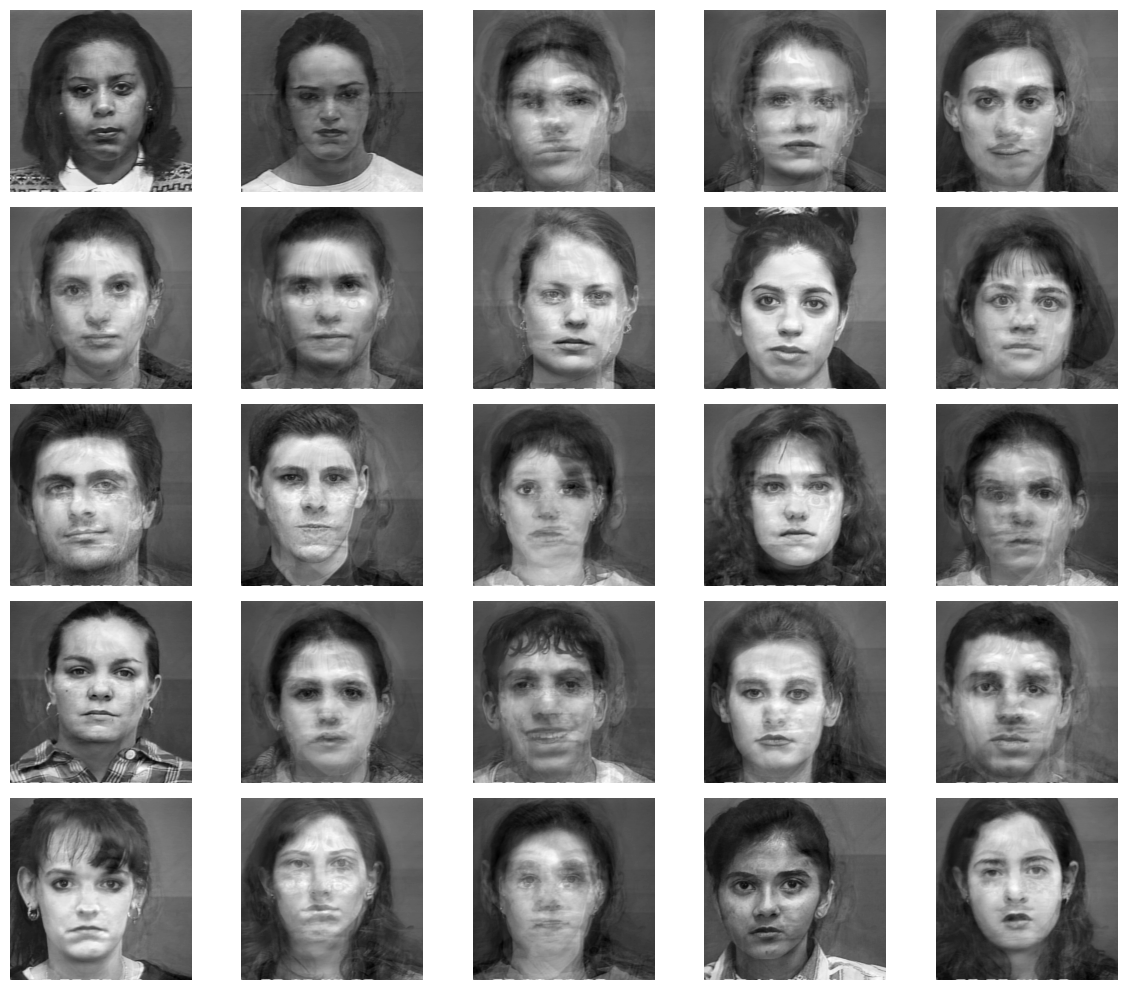

In [420]:
X = np.array(train_faces) # X.shape = (25, 425, 425)
X_flat = X.reshape((25, -1)) # X_flat.shape = (25, 180625)

mu = np.mean(X_flat, axis=0)
std = np.std(X_flat, axis=0)
std_filled = np.where(std == 0, 1.0, std)
X_standardized = (X_flat - mu) / std_filled

S = np.cov(X_standardized) # S.shape = (25, 25)
eigenvalues, eigenvectors = np.linalg.eig(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices] # eigenvectors.shape = (25, 25)

k = 15
selected_eigenvectors = eigenvectors[:, :k]

# Project the standardized data onto the selected eigenvectors => To find out that single number(data point) per image
projected_data = X_standardized.T @ selected_eigenvectors # (180625, 25) matmul (25, k) => (180625, k)

# Reconstruct the data by multiplying the projected data by the selected eigenvectors =>  Multiplying single number per image with selected eigenvectors
reconstructed_data = projected_data @ selected_eigenvectors.T # (180625, k) matmul (k, 25) => (180625, 25)

reconstructed_data = (reconstructed_data.T * std_filled) + mu # (25, 180625)
reconstructed_faces = reconstructed_data.reshape((25, 425, 425))

plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Task3 (40 points)
1. Load all the test images from "/Eigenfaces/Test"
2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 5, k = 15.

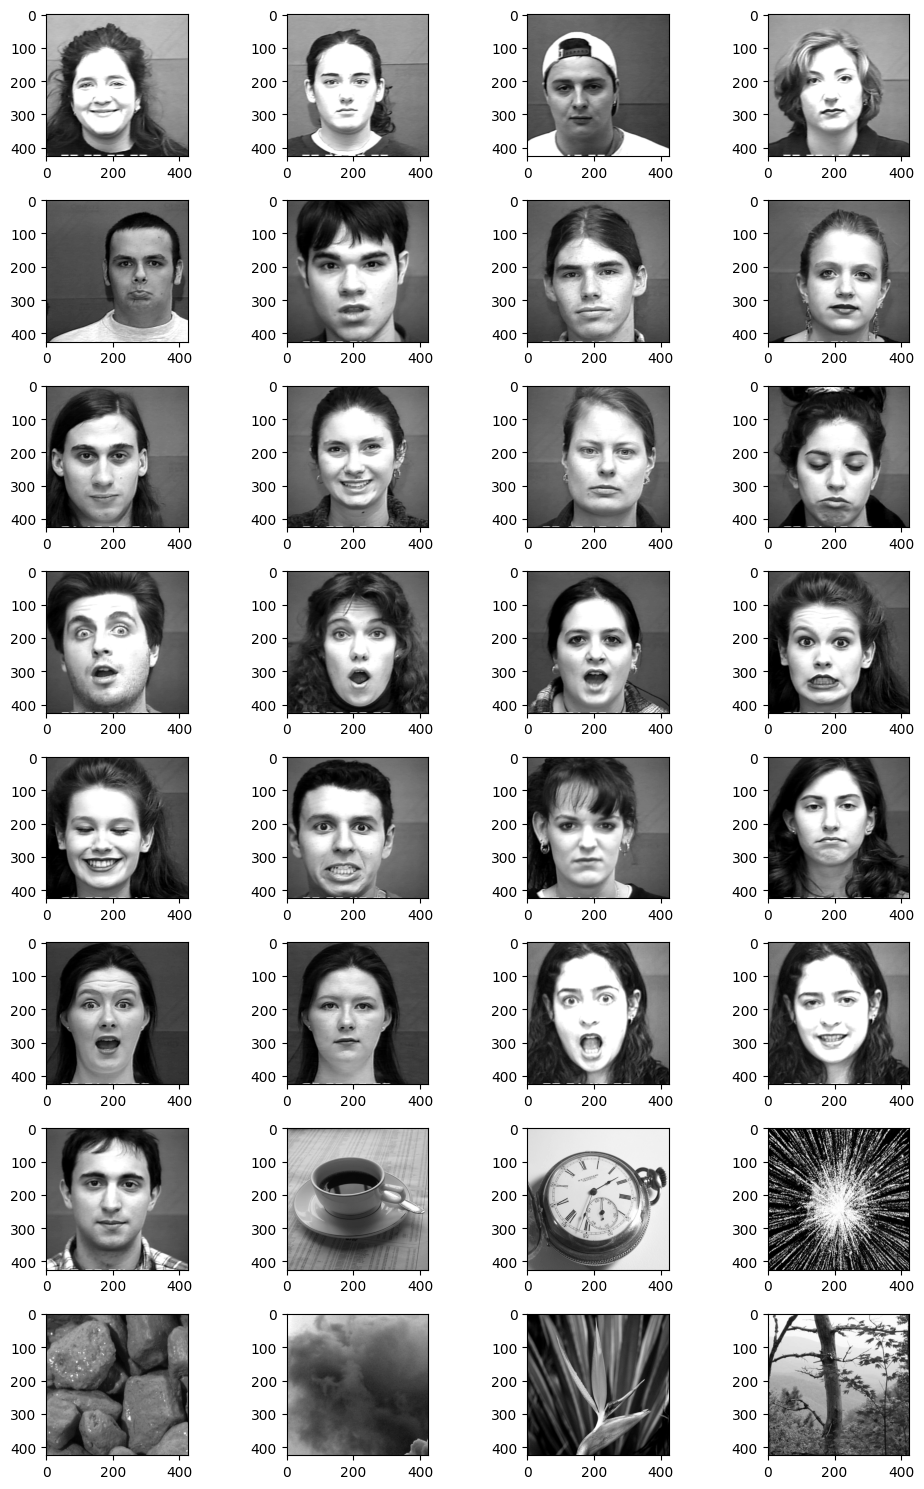

In [421]:
testfaces = os.listdir('./Eigenfaces/Test')

plt.figure(figsize=(10,15))
test_faces = []
for i, testface in enumerate(testfaces):
    face = cv2.imread(os.path.join('./Eigenfaces/Test', testface), 0)
    test_faces.append(face) # Each image = (425, 425)
    
    plt.subplot(8 ,4, i+1)
    plt.imshow(face, cmap='gray')

plt.tight_layout()
plt.show()

In [422]:
# template = cv2.imread('./Eigenfaces/Train/S058_002_00021024.jpg', 0)
# template = template[90:340, 90:310]
# template = cv2.resize(template, (250, 250))
# template = cv2.GaussianBlur(template, (7, 7), 3)
# plt.imshow(template, cmap='gray')
# plt.show()

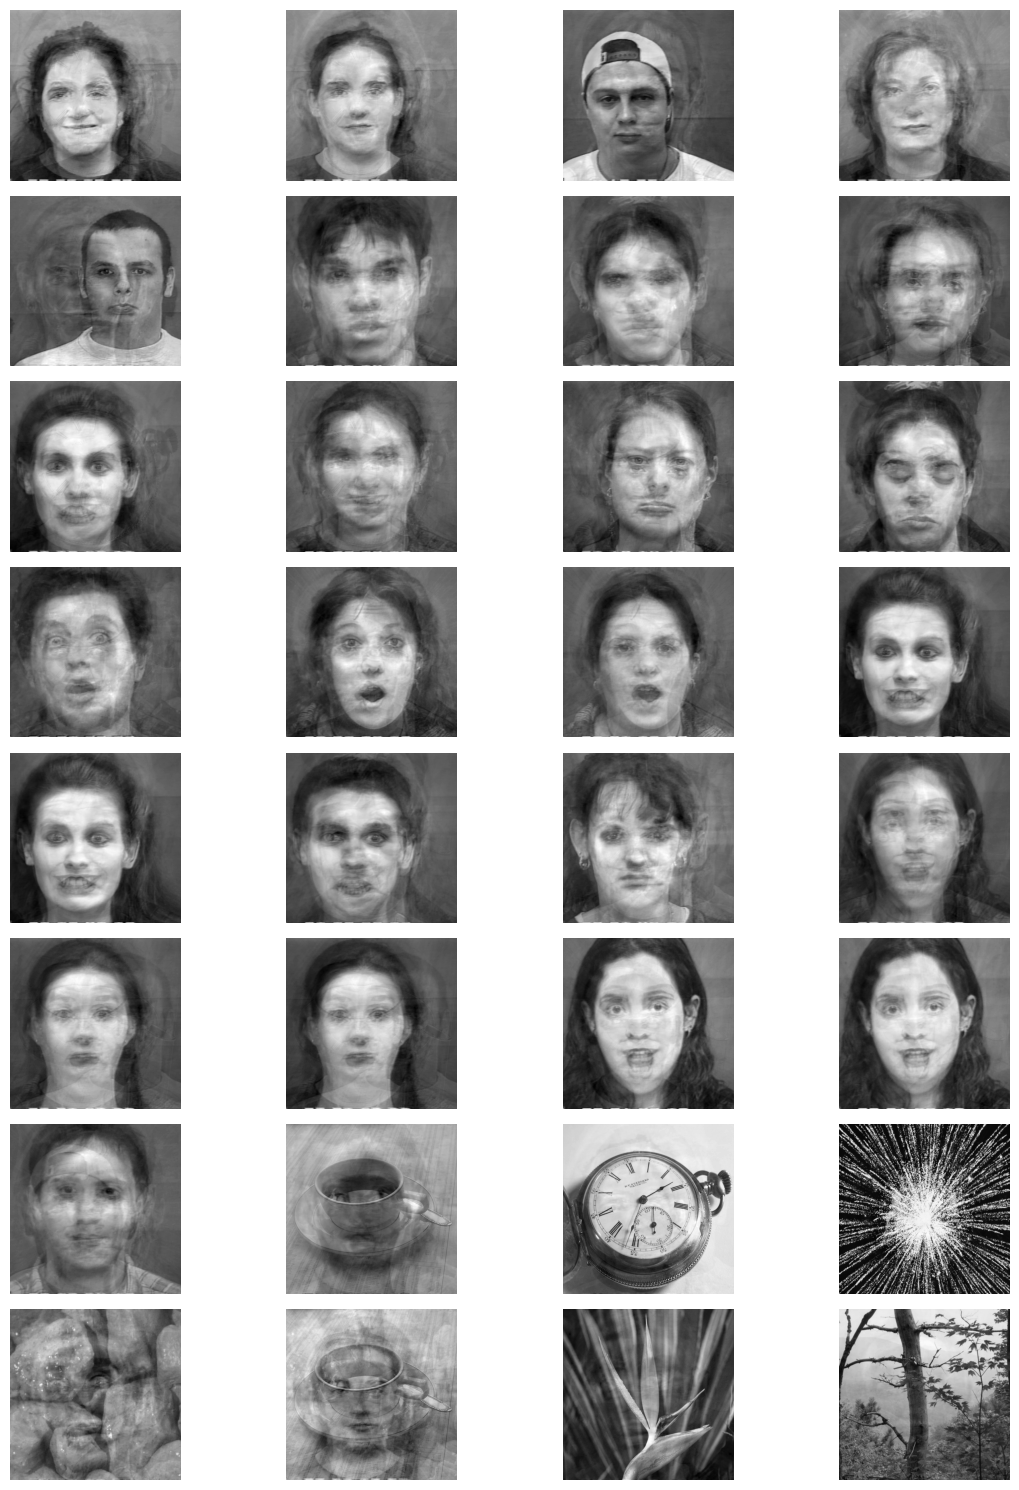

In [437]:
Y = np.array(test_faces) # X.shape = (32, 425, 425)
Y_flat = Y.reshape((32, -1)) # X_flat.shape = (32, 180625)

mu = np.mean(Y_flat, axis=0)
std = np.std(Y_flat, axis=0)
std_filled = np.where(std == 0, 1.0, std)
Y_standardized = (Y_flat - mu) / std_filled
# Y_standardized = Y_flat

S = np.cov(Y_standardized) # S.shape = (32, 32)
eigenvalues, eigenvectors = np.linalg.eig(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices] # eigenvectors.shape = (32, 32)

k = 15
selected_eigenvectors_test = eigenvectors[:, :k] # (32, k)

# Project the standardized data onto the selected eigenvectors => To find out that single number(data point) per image
projected_data = Y_standardized.T @ selected_eigenvectors_test # (180625, 32) matmul (32, k) => (180625, k)

# Reconstruct the data by multiplying the projected data by the selected eigenvectors =>  Multiplying single number per image with selected eigenvectors
reconstructed_test_data = projected_data @ selected_eigenvectors_test.T # (180625, k) matmul (k, 32) => (180625, 32)

reconstructed_test_data = (reconstructed_test_data.T * std_filled) + mu # (25, 180625)
reconstructed_test_faces = reconstructed_test_data.reshape((32, 425, 425))

plt.figure(figsize=(12, 15))
for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(reconstructed_test_faces[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Finding distance between test images and 
nearest_training_distance = []
for reconstructed_face in reconstructed_test_faces:
    distances = []
    tuple = ()
    for training_face in train_faces:
        distance = np.linalg.norm(reconstructed_face - training_face)
        distances.append(distance)
    # Find the index of the nearest training face
    min_distance = min(distances)
    # print(distances,'\n')
    tuple = (distances.index(min_distance), min_distance)
    nearest_training_distance.append(tuple)

# for i in range(len(nearest_training_distance)):
#     print(i+1, nearest_training_distance[i])

# distance_threshold = 30000
# classification_results = []

# for _, distance in nearest_training_distance:
#     if distance < distance_threshold:
#         classification_results.append("Face")
#     else:
#         classification_results.append("Non-Face")

# print(classification_results)

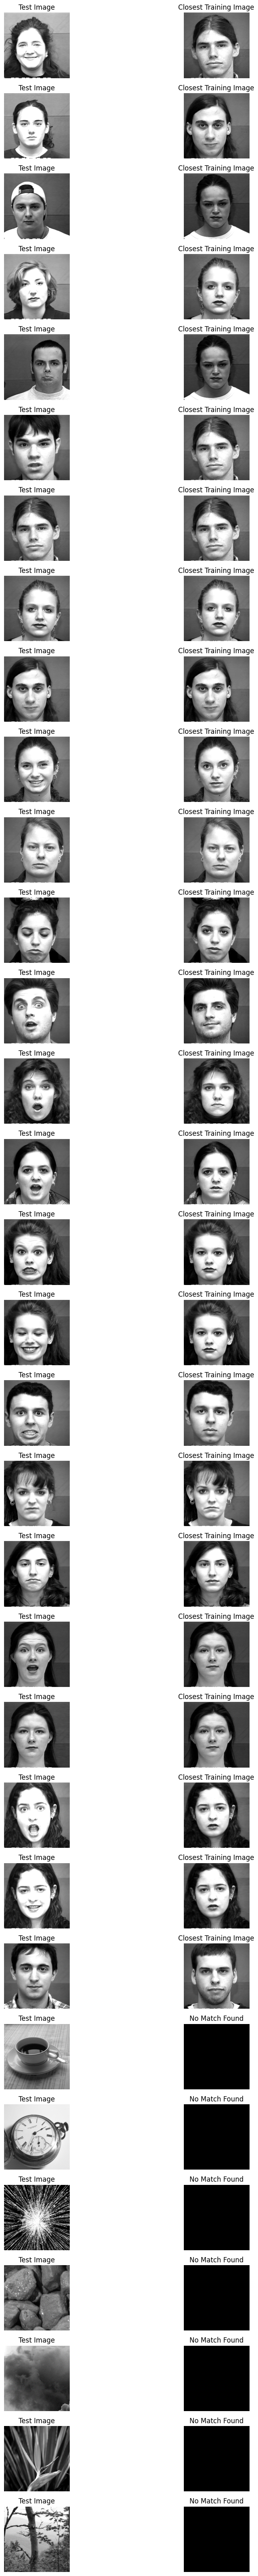

In [438]:
# Initialize a figure to display the images
plt.figure(figsize=(12, 2 * len(test_faces)))

empty_image = np.ones((425, 425))
# Loop through each test image and its nearest training image
for i, (test_face, (nearest_training_index, _)) in enumerate(zip(test_faces, nearest_training_distance), start=1):
    # Plot test image on the left
    plt.subplot(len(test_faces), 2, i * 2 - 1)
    plt.imshow(test_face, cmap='gray')
    plt.title('Test Image')
    plt.axis('off')

    # if nearest_training_index is not None and nearest_training_index < len(train_faces):
    if i<=25:
        nearest_training_face = train_faces[nearest_training_index]
        plt.subplot(len(test_faces), 2, i * 2)
        plt.imshow(nearest_training_face, cmap='gray')
        plt.title('Closest Training Image')
        plt.axis('off')
    else:
        plt.subplot(len(test_faces), 2, i * 2)
        plt.imshow(empty_image, cmap='gray')
        plt.title('No Match Found')
        plt.axis('off')

plt.tight_layout()
plt.show()


### Submission Guidelines:
1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb
2. Import all the images from the ./Eigenfaces directory. Your TA will use the same directory name to grade your submission.
3. You don't need to attach the dataset with your submission.

Assignment Courtesy: Prof. Farhad Kamangar, CSE@UTA

## References

1. https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
2. Tutorial: https://medium.com/@pranjallk1995/pca-for-image-reconstruction-from-scratch-cf4a787c1e36
3. Face or non-face: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html